### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing Data

In [242]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [243]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [244]:
# Importing and inspecting the dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [245]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [246]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [247]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [248]:
# checking the number of unique values in all the cols. If a column has 90% or more the one single value we delete that column.
for cols in leads_data.columns:
    print(f"column name : {cols} :  no of unique values --> {leads_data[cols].nunique()}\n")
    print(leads_data[cols].value_counts().sort_index())
    print("---------------------------------------------\n\n")
    

column name : Prospect ID :  no of unique values --> 9240

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
0006d10a-eb01-4ba9-92e2-ad78588b2a40    1
0011be30-fa97-465b-8e44-0ae83dff7eed    1
0011f23e-9fd9-4256-b316-efc2e2639b0d    1
001b0ad3-9096-4af8-8205-912f5c6dafd8    1
                                       ..
ffec8e24-0c99-4345-89f1-e3ad6689764f    1
fff076a3-fe95-4c79-9401-e15846be8086    1
fff49ad0-6015-448c-a7cc-f454c39ffdda    1
fff4f056-6574-4f97-b85a-ea4198a2915b    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------


column name : Lead Number :  no of unique values --> 9240

Lead Number
579533    1
579538    1
579545    1
579546    1
579564    1
         ..
660681    1
660719    1
660727    1
660728    1
660737    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------


column name : Lead Origin :  no of unique values --> 5

Lead Origin
API                 

In [249]:
# removing columns of no significant importance
leads_data.drop(columns=['Prospect ID','Do Not Email','Do Not Call','What matters most to you in choosing a course',
                                    'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                                   'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                                    'Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True,axis=1)

# we delete the 'Prospect ID' column also since it is of no use in the analysis

In [250]:
# replacing the value 'Select' as a missing value in cols
leads_data.City.replace('Select',np.nan,inplace=True)
leads_data.Specialization.replace('Select',np.nan,inplace=True)
leads_data['How did you hear about X Education'].replace('Select',np.nan,inplace=True)
leads_data['Lead Profile'].replace('Select',np.nan,inplace=True)

In [251]:
# Calculating percentage of null values in all the remaining cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

How did you hear about X Education        78.463203
Lead Profile                              74.188312
Lead Quality                              51.590909
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
City                                      39.707792
Specialization                            36.580087
Tags                                      36.287879
What is your current occupation           29.112554
Country                                   26.634199
Page Views Per Visit                       1.482684
TotalVisits                                1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Number                                0.000000
Lead Origin                                0.000000
Total Time Spent on Website                0.000000
Converted   

In [252]:
# Dropping columns with missing values more than or equal to 35%
leads_data.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Profile Index',
                         'Asymmetrique Activity Index','Asymmetrique Activity Score','City','Tags','Specialization'],axis=1,inplace=True)

In [253]:
# Missing values in columns 'What is your current occupation','Country' should be replaced by the mean, median or 
# mode value whichever applicable
leads_data[['What is your current occupation','Country']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   What is your current occupation  6550 non-null   object
 1   Country                          6779 non-null   object
dtypes: object(2)
memory usage: 144.5+ KB


Since both the above columns are of object type , we need to replace the missing values in these columns by their respective mode value

In [254]:
cols_wid_missingvalues=['What is your current occupation','Country']

In [255]:
# replacing the missing values with modes of the respective cols
for i in cols_wid_missingvalues:
    leads_data[i].fillna(leads_data[i].mode()[0],axis=0,inplace=True)

In [256]:
# dropping rows in columns where missing value percentage is too low
leads_data.dropna(subset=['Page Views Per Visit','TotalVisits','Last Activity','Lead Source'],axis=0,inplace=True)

In [257]:
# checking missing values again in cols
100*(leads_data.isnull().mean())

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now there are no missing values in the dataset. 

In [258]:
# checking shape of the dataframe
leads_data.shape

(9074, 12)

#### Converting the binary variables (Yes/No) to 0/1

In [259]:
# Applying a binary map function
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0}).astype('object')

In [260]:
print(leads_data.columns)

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [261]:
# renaming the column names
leads_data.rename(columns={'Total Time Spent on Website':'Web_Time','Page Views Per Visit':'Page_Views','What is your current occupation':'Occupation',
                           'A free copy of Mastering The Interview':'Interview_Copy','Last Notable Activity':'Last_Notable_Act'},inplace=True)

In [262]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Web_Time,Page_Views,Last Activity,Country,Occupation,Interview_Copy,Last_Notable_Act
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,Modified


In [263]:
# dropping some more insignificant columns
leads_data.drop(columns=['Last_Notable_Act'],axis=1,inplace=True)

In [264]:
leads_data=leads_data[['Lead Number','Lead Origin', 'Lead Source', 'TotalVisits', 'Web_Time',
       'Page_Views', 'Last Activity', 'Country', 'Occupation',
       'Interview_Copy','Converted']]

In [265]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,TotalVisits,Web_Time,Page_Views,Last Activity,Country,Occupation,Interview_Copy,Converted
0,660737,API,Olark Chat,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,0
1,660728,API,Organic Search,5.0,674,2.5,Email Opened,India,Unemployed,0,0
2,660727,Landing Page Submission,Direct Traffic,2.0,1532,2.0,Email Opened,India,Student,1,1
3,660719,Landing Page Submission,Direct Traffic,1.0,305,1.0,Unreachable,India,Unemployed,0,0
4,660681,Landing Page Submission,Google,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,1


### Univariate Analysis

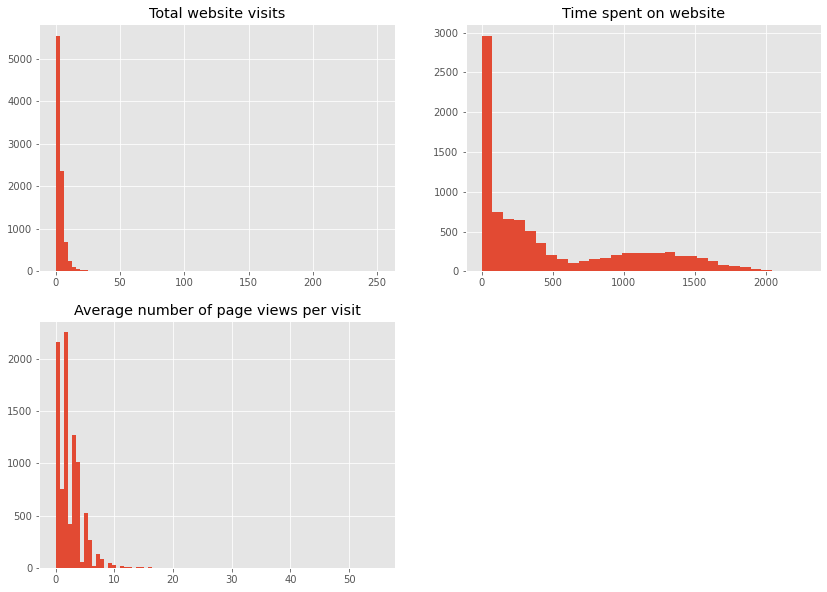

In [266]:
# Numerical columns
# Set style
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(leads_data.TotalVisits, bins = 80)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(leads_data.Web_Time, bins = 30)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(leads_data.Page_Views, bins = 80)
plt.title('Average number of page views per visit')

plt.show()

In [267]:
num_cols=leads_data.select_dtypes(include='number').columns
cat_cols=leads_data.select_dtypes(include='object').columns
print(f'numeric columns\n{num_cols}')
print()
print(f'categorical columns\n{cat_cols}')

numeric columns
Index(['Lead Number', 'TotalVisits', 'Web_Time', 'Page_Views', 'Converted'], dtype='object')

categorical columns
Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Occupation',
       'Interview_Copy'],
      dtype='object')


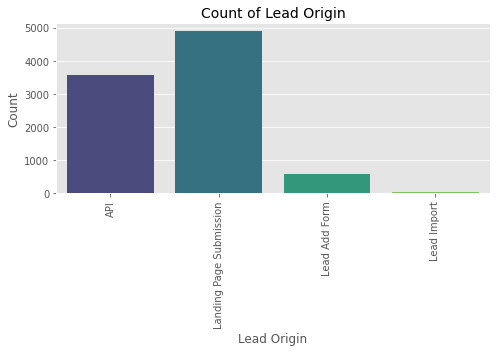

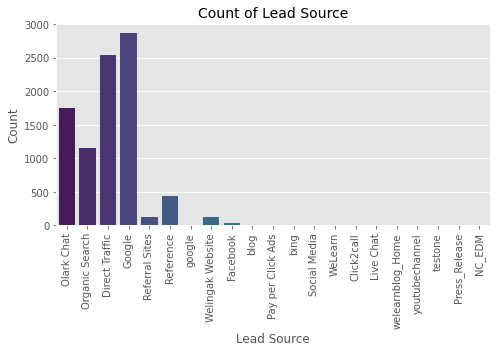

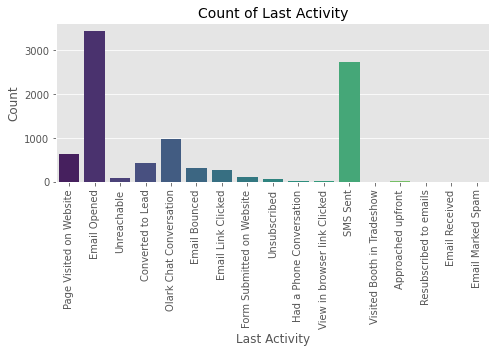

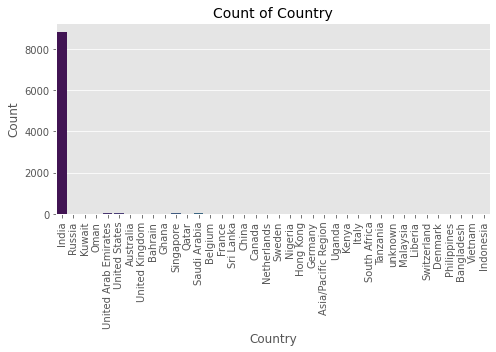

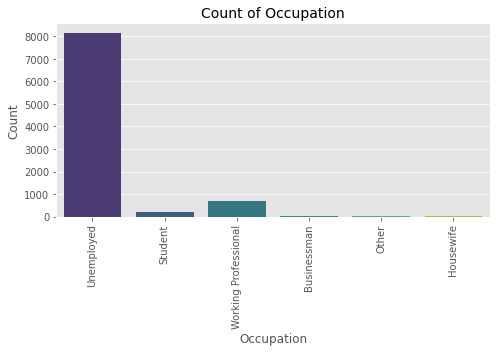

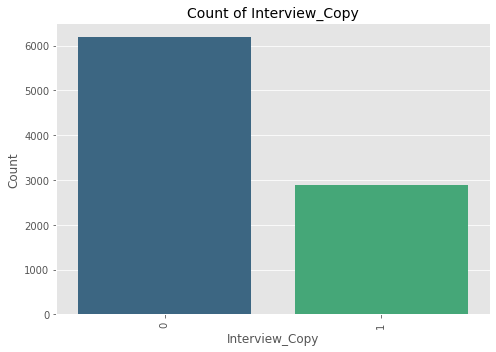

In [268]:
# Loop through categorical columns and create separate plots
for col in cat_cols:
    plt.figure(figsize=(7, 5))  # Create a new figure for each plot
    
    # Countplot for each categorical variable
    sns.countplot(data=leads_data, x=col, palette="viridis")
    
    # Formatting
    plt.title(f'Count of {col}', fontsize=14)  
    plt.xlabel(col, fontsize=12)             
    plt.ylabel("Count", fontsize=12)           
    plt.xticks(rotation=90, fontsize=10)       

    plt.tight_layout()  # Prevent overlapping layout
    plt.savefig(f'D:/UPGRAD/lead scoring images/{col}.png',dpi=300, bbox_inches='tight')
    plt.show()  # Show each plot separately

## Insights for ppt

### 1. **Country**

> **Insight:** The overwhelming majority of leads come from **India**, far outnumbering any other country.

**Business Takeaway:**  
This indicates a strong local presence or brand recognition in India. X Education may want to **focus marketing efforts** on Indian audiences, while also **exploring opportunities** to expand in other countries where there is emerging interest.

---

### 2. **Interview_Copy**  
(`Interview_Copy` indicates whether the lead requested a free copy of “Mastering the Interview”: `1` = Yes, `0` = No)

> **Insight:** A substantial portion of leads (roughly 35–40%) **request** the free interview copy, suggesting **higher job-preparation interest** among these individuals.

**Business Takeaway:**  
Leads who opt in for the free copy often show stronger intent. **Target** these leads with **tailored follow-ups** (e.g., webinars, personalized emails) to **increase conversion** rates.

---

### 3. **Last Activity**  
(The most recent interaction by the lead)

> **Insight:** “**Page Visited on Website**” and “**Email Opened**” are the top last activities, indicating that **website visits** and **email campaigns** are crucial touchpoints for lead engagement.

**Business Takeaway:**  
Continuously **optimize website content** and **refine email strategies** to keep leads engaged. Consider **behavior-based triggers** (e.g., automated follow-up emails after a page visit) to move leads closer to enrollment.

---

### 4. **Lead Origin**  
(Where the lead initially came from)

> **Insight:** “**Landing Page Submission**” generates the highest volume of leads, followed by “API” entries.

**Business Takeaway:**  
The **landing page** is effectively capturing lead information. Enhance it further by **A/B testing** headlines, forms, or CTAs (Call to Action) to maximize conversions.

---

### 5. **Lead Source**  
(The specific channel bringing in the lead)

> **Insight:** **Olark Chat** and **Organic Search** dominate lead sources, with **Direct Traffic** and **Google** also contributing significantly.

**Business Takeaway:**  
Real-time **chat interactions** and **SEO** (search engine optimization) are **key drivers**. Ensure **prompt, high-quality chat support** and **continual SEO improvements** to capitalize on these popular sources.

---

### 6. **Occupation**

> **Insight:** A large majority of leads are **Unemployed**, followed by smaller segments of **Working Professionals** and **Students**.

**Business Takeaway:**  
The platform appeals heavily to **job seekers** looking to upskill or reskill. Tailor **course offerings** and **marketing messages** to highlight **career transition** and **employability** benefits to resonate with this demographic.

### Insights

1. **Country**: Most leads come from **India**, suggesting a focus on Indian audiences with potential expansion elsewhere.

2. **Interview_Copy**: Those who request the free interview guide show **higher intent**, making them prime targets for personalized follow-ups.

3. **Last Activity**: Website visits and email opens are the most common final actions, indicating the importance of **website content** and **email campaigns**.

4. **Lead Origin**: **Landing Page Submissions** generate the most leads, so optimizing landing pages can further boost conversions.

5. **Lead Source**: **Olark Chat** and **Organic Search** are top channels, emphasizing the need for strong **live chat support** and **SEO** strategies.

6. **Occupation**: The majority of leads are **Unemployed**, highlighting the importance of promoting **career-building** benefits to this group.

### Bivariate Analysis

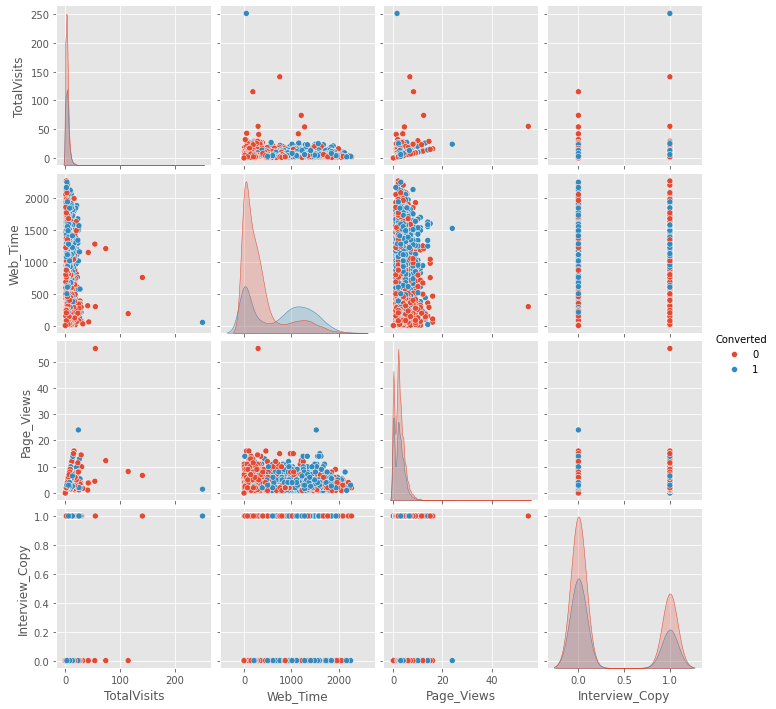

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualising the correlations via pairplot for numeric variables
sns.pairplot(leads_data[['TotalVisits','Web_Time','Page_Views','Interview_Copy','Converted']],diag_kind='kde',hue='Converted')
# Save the figure in a folder
plt.savefig("D:/UPGRAD/lead scoring images/PairplotforNumVars.png", dpi=300, bbox_inches='tight')
plt.show()

## Insights for ppt

## 1. Higher Website Engagement → Higher Conversions
- **Variables**: `Web_Time` (total time on website), `Page_Views` (pages viewed), `Converted`
- **Insight**: Leads who spend **more time** on the website and **view more pages** tend to show a higher likelihood of conversion (becoming paying customers). On the pairplot, the **blue points** (converted) cluster toward higher values of `Web_Time` and `Page_Views` compared to the **red points** (not converted).

**Business Takeaway**:  
Encourage deeper engagement on the website. Provide clear navigation, useful content, or personalized recommendations to keep visitors on the site longer, which correlates with higher conversion rates.

---

## 2. Requesting a Free Copy of “Mastering the Interview” Signals High Intent
- **Variable**: `Interview_Copy` (whether the lead wants a free copy)
- **Insight**: The plots suggest that leads who **opt in** for the free copy of “Mastering the Interview” (`Interview_Copy = 1`) are more likely to convert. The density and scatter plots show a stronger concentration of **blue points** (converted) among those who want the free copy.

**Business Takeaway**:  
Leads who request the free copy exhibit **high intent**. Target these leads with additional follow-ups—such as personalized emails or direct contact from a sales representative—to capitalize on their demonstrated interest.

---

## 3. Web Time and Page Views are Positively Correlated
- **Variables**: `Web_Time`, `Page_Views`
- **Insight**: The pairplot reveals a **positive correlation** between the total time spent on the website and the number of pages viewed. Visitors who spend more time typically explore more pages.

**Business Takeaway**:  
Enhance website design and content flow to encourage exploration. Suggest related content, show popular course offerings, or highlight testimonials to keep users engaged and build trust.

---

## 4. High Total Visits Alone Do Not Guarantee Conversion
- **Variable**: `TotalVisits` (number of times the lead visited the website)
- **Insight**: Multiple visits can indicate interest, but the pairplot shows that **simply visiting frequently** does not always result in conversion. Some leads have high `TotalVisits` yet remain unconverted.

**Business Takeaway**:  
Focus on the **quality** of engagement. After the first few visits, consider proactive measures—such as pop-up offers, chat support, or targeted remarketing—to nudge these visitors toward conversion rather than relying on repeated visits alone.

---

## 5. Identifying High-Engagement Leads Early is Key
- **Combined Insight**: Leads who ultimately convert often display multiple high-engagement signals: higher `Web_Time`, higher `Page_Views`, and a request for a free interview copy.
- **Interpretation**: A visitor who returns multiple times, spends significant time per session, views several pages, **and** requests the free “Mastering the Interview” copy is demonstrating strong intent to convert.

**Business Takeaway**:  
Prioritize leads with **multiple engagement signals** for direct outreach. Offer targeted promotions, special webinars, or personal consultation to convert these high-potential leads into paying customers.

### Insights

1. **High Website Engagement → Better Conversions**: More time on site and more page views often lead to higher conversion rates.  
2. **Free Copy Request Signals Intent**: Leads who request “Mastering the Interview” show higher intent and are more likely to convert.  
3. **Web Time & Page Views Correlate**: Visitors who spend more time also view more pages, indicating deeper engagement.  
4. **Total Visits ≠ Guaranteed Conversion**: Frequent visits alone don’t ensure conversion; the quality of engagement matters more.  
5. **Prioritize High-Engagement Leads**: Focus on leads who show multiple signs of interest (e.g., free copy request, long site visits) for targeted follow-ups.

##### For categorical variables with multiple levels, creating dummy features (one-hot encoding)

In [ ]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Occupation','Interview_Copy']], drop_first=True,dtype=int)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [ ]:
leads_data.head()

In [ ]:
# removing the original columns for which dummy variables have been created
leads_data.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Occupation','Interview_Copy'],axis=1,inplace=True)

In [ ]:
leads_data.shape

In [ ]:
leads_data.info()

In [ ]:
# Calculating percentage of null values in all the cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

#### Checking outliers for the continuous numeric variables except the dummy variables

In [ ]:
# Checking for outliers in the numeric variables
num_leads = leads_data[['TotalVisits','Web_Time','Page_Views']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

In [ ]:
# visualizing for outliers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.boxplot(num_leads)
plt.savefig('D:/UPGRAD/lead scoring images/num_outlier.png',dpi=300, bbox_inches='tight')

We can see that the columns TotalVisits and Page_Views have outliers

In [ ]:
# Calculating percentage of null values in all the cols
(100*leads_data.isnull().mean()).sort_values(ascending=False)

In [ ]:
# List of columns to check for outliers
cols = ['TotalVisits', 'Web_Time', 'Page_Views']

# Start with a boolean mask that is True for all rows
mask = pd.Series(True, index=leads_data.index)

# Loop through each column and update the mask:
# Only keep rows where the value is between the 1st and 99th percentile.
for col in cols:
    # Calculate the 1st and 99th percentiles for the current column
    lower_bound = leads_data[col].quantile(0.01)
    upper_bound = leads_data[col].quantile(0.99)
    print(f"For column '{col}': Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    
    # Update the mask: a row remains True only if its value in this column is within bounds.
    mask &= (leads_data[col] >= lower_bound) & (leads_data[col] <= upper_bound)

# Apply the mask to the entire DataFrame.
# This removes any row that has an outlier in any of the three columns.
leads_data = leads_data[mask].reset_index(drop=True)

print("New shape of leads_data after outlier removal:", leads_data.shape)


In [ ]:
leads_data[['TotalVisits','Web_Time','Page_Views']].describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

In [ ]:
sns.boxplot(leads_data[['TotalVisits','Web_Time','Page_Views']])

Now we can see that there are negligible number of outliers remaining

In [ ]:
leads_data.shape

In [ ]:
leads_data.info()

We can see that all the variables are of numeric type now

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
data = leads_data.copy()

X = leads_data.drop(['Converted'], axis=1)

X.head()

In [ ]:
# Putting response variable to y
y = leads_data.Converted

y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
lead_number_train = X_train['Lead Number']
lead_number_test  = X_test['Lead Number']

# Now drop the Lead Number column from the feature sets that go into modeling.
X_train_model = X_train.drop('Lead Number', axis=1)
X_test_model  = X_test.drop('Lead Number', axis=1)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_model[['TotalVisits','Web_Time','Page_Views']] = scaler.fit_transform(X_train_model[['TotalVisits','Web_Time','Page_Views']])

X_train_model.head()

In [ ]:
### Checking the Lead Conversion Rate
(sum(leads_data['Converted'])/leads_data.shape[0])*100

The conversion rate is about 37% which indicates that there is no class imbalance in the dataset.

#### Looking at Correlations

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,80))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [ ]:
X_test_model = X_test_model.drop(['Occupation_Working Professional'], axis=1)
X_train_model = X_train_model.drop(['Occupation_Working Professional'], axis=1)

#### Model Building and Automated Feature Selection Using RFE

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_model, y_train)

In [ ]:
rfe.support_

In [ ]:
# Convert np.bool_ and np.int64 to native Python types
output = [(col, bool(s), int(r)) for col, s, r in zip(X_train_model.columns, rfe.support_, rfe.ranking_)]
print(output)

In [ ]:
# 15 best features selected by the recursive feature elimination(RFE)
col = X_train_model.columns[rfe.support_]
print(col)

In [ ]:
# features not selected by rfe
no_col=X_train_model.columns[~rfe.support_]
print(no_col)

##### Building and Assessing the model with StatsModels

In [ ]:
# building model using the 15 best features selected by rfe
# Model 1
X_train_sm = sm.add_constant(X_train_model[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual lead converted and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Create the confusion matrix in a presentable dataframe form
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

In [ ]:
# Calculating recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

The present recall score for the training set is almost 69%. We are supposed to maintain the recall score around 80%.



#### Checking VIFs for multicollinearity among the independent variables

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Model 2
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

In [ ]:
# checking vif again for model 2
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
col = col.drop(['Lead Origin_Lead Add Form'],1) # since its vif is 98.39 >> 5
print(f"number of cols : {len(col)}")
print(col)

In [ ]:
# Model 3
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

In [ ]:
# checking vifs again for model 3
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
col = col.drop(['Country_Saudi Arabia'],1) # since its p value is more than 0.05
print(f"number of cols : {len(col)}")
print(col)

In [ ]:
# Model 4
X_train_sm = sm.add_constant(X_train_model[col])
lm = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial()).fit()
print(lm.summary())

In [ ]:
# checking vifs again for model 4
df1 = X_train_model[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

Now we can see that no p values are more than 0.05 and all the vifs are less than 3. So no need to drop any other feature now.

In [ ]:
y_train_pred_final_new = pd.DataFrame({'Converted':y_train.values})
y_train_pred_final_new.head()

In [ ]:
# predicting the probabilities using the updated model
y_train_pred_new = lm.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final_new['Convert_Prob'] = y_train_pred_new
y_train_pred_final_new.head()

In [ ]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
# 0.5 being a random cutoff  probability threshold.
y_train_pred_final_new['predicted'] = y_train_pred_final_new.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_new.head()

In [ ]:
# constructing the confusion matrix using the updated model(Model 4)
cm=metrics.confusion_matrix(y_train_pred_final_new.Converted,y_train_pred_final_new.predicted)
print(cm)

In [ ]:
# Calculating final recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['predicted']))
# Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)
TN, FP, FN, TP = cm.ravel()

# Calculate specificity: TN / (TN + FP)
specificity = TN / (TN + FP)
print('specificity --> ', specificity)

It seems that after deleting few features also, the recall almost remains the same. So we need to try changing the cut_off probablility keeping in mind the target recall score of around 80%

### Plotting the ROC Curve

In [ ]:
# Defining a function for constructing the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})' )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# roc curve for the updated model (Model 4)
draw_roc(y_train_pred_final_new.Converted, y_train_pred_final_new.Convert_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy,sensitivity and specificity

In [ ]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_new[i]= y_train_pred_final_new.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_new.head()

In [ ]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_new.Converted, y_train_pred_final_new[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

From the above it is clear that our previous cutoff of 0.5 was not optimal. Instead something around 0.3 would be a better choice.

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

so around 0.32 cutoff would be better. lets try the cutoff 0.32

In [ ]:
# Changing the cutoff to 0.32
y_train_pred_final_new['final_predicted'] = y_train_pred_final_new.Convert_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final_new.head(10)

In [ ]:
# creating the confusion matrix for the updated cutoff 
cm1=metrics.confusion_matrix(y_train_pred_final_new.Converted,y_train_pred_final_new.final_predicted)
print(cm1)

In [ ]:
# Calculating final recall and accuracy score on the training data
print('recall --> ', metrics.recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted']))
print('accuracy --> ', metrics.accuracy_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted']))
# Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)
TN, FP, FN, TP = cm1.ravel()

# Calculate specificity: TN / (TN + FP)
specificity = TN / (TN + FP)
print('specificity --> ', specificity)

so from the above we can see that we have achieved the recall as 81% which is better than the required target of 80%

In [ ]:
y_train_pred = lm.predict(X_train_sm)

# Create a DataFrame for the training set results, ensuring all series are of equal length
train_results = pd.DataFrame({
    'Lead Number': lead_number_train,                     # should have the same length as X_train_model
    'Converted': y_train,                                 # actual conversion values from training set
    'Convert_Prob': y_train_pred,                         # predicted probabilities from the model
    'Final_Predicted': [1 if x > 0.32 else 0 for x in y_train_pred],  # applying cutoff 0.32
    'Lead_Score': (y_train_pred * 100).round(0)           # calculating lead score and rounding off
})

print(train_results.head())

In [ ]:
# Verifying recall(sensitivity), specificity and accuracy for train_results
print(f'recall --> {metrics.recall_score(train_results.Converted,train_results.Final_Predicted)}')
print(f'specificity --> {metrics.recall_score(train_results.Converted,train_results.Final_Predicted,pos_label=0)}')
print(f'accuracy --> {metrics.accuracy_score(train_results.Converted,train_results.Final_Predicted)}')

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted'])

In [ ]:
recall_score(y_train_pred_final_new['Converted'], y_train_pred_final_new['final_predicted'])

### Step 11: Making predictions on the test set

In [ ]:
# transforming the numeric variables in testing data using standard scaler
X_test_model[['TotalVisits','Web_Time','Page_Views']] = scaler.transform(X_test_model[['TotalVisits','Web_Time','Page_Views']])

In [ ]:
# using the same 15 cols in testing selected by rfe
X_test_model = X_test_model[col]
X_test_model.head()

In [ ]:
#Adding a constant column
X_test_sm = sm.add_constant(X_test_model)

Making predictions on the test set

In [ ]:
# predicting the probabilities using the final model
y_test_pred = lm.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.rename(columns={0:'Convert_Prob'},inplace=True)

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
# Calculating final recall and accuracy score on the testing data
print('recall --> ', metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('accuracy --> ', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('specificity --> ', metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted,pos_label=0))

From the above we can see that the recall on the test data comes as 80.6% which is very close to the recall on the training data of 81%. This indicates the model is perfectly ok.

Now assigning a lead score for every lead number in the dataset. We are multiplying the Convert_Prob column by 100 thus obtaining the required lead score.  

In [ ]:
# Generate predicted probabilities using your logistic regression model
y_test_pred = lm.predict(X_test_sm)

# Create the test results DataFrame ensuring all series have matching lengths
test_results = pd.DataFrame({
    'Lead Number': lead_number_test,
    'Converted': y_test,  # actual conversion status from test set
    'Convert_Prob': y_test_pred,
    'Final_Predicted': [1 if prob > 0.32 else 0 for prob in y_test_pred],
    'Lead_Score': (y_test_pred * 100).round(0)
})

print(test_results.head())

In [ ]:
final_results = pd.concat([train_results, test_results], axis=0).reset_index(drop=True)

# 'final_results' now clearly shows each Lead Number with its corresponding lead score.
print(final_results.head(10))

#### The above completes our lead scoring case study in which every lead number is assigned a lead score where a lead score of 32 or more indicates that lead is a hot lead. 

### Conclusion<br>

Candidates with lead score 32 or more should be contacted and should be offered the course.